In [1]:
import pandas as pd
import duckdb
from constant import GRAY_1, GRAY_2, GRAY_3, BLUE_1


df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [2]:
df_quantity_brand = duckdb.query(
    """
             SELECT make AS Brand, SUM(quantity) as Quantity 
             FROM df 
             GROUP BY make 
             ORDER BY quantity DESC"""
).df().set_index("Brand")

df_quantity_brand.head()

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0


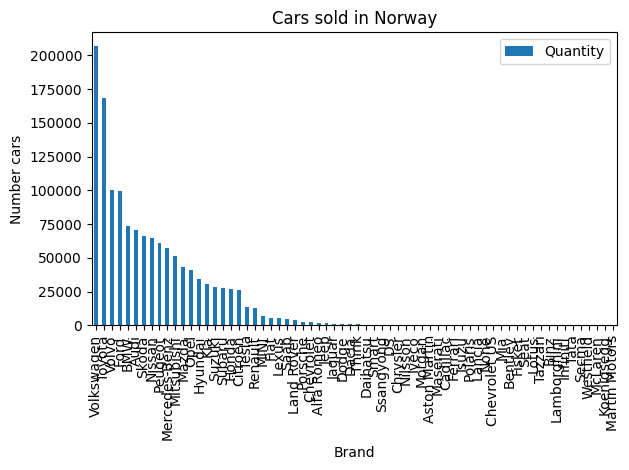

In [3]:
ax = df_quantity_brand.plot(
    kind="bar",
    y="Quantity",
    title="Cars sold in Norway",
    ylabel="Number cars",
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_brand_sold.png")

In [4]:
df_quantity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


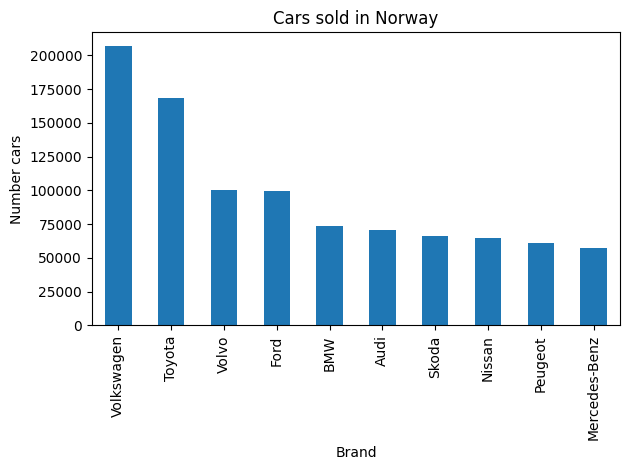

In [5]:
ax = df_quantity_brand.iloc[:10].plot(
    kind="bar",
    y="Quantity",
    title="Cars sold in Norway",
    ylabel="Number cars",
)
ax.get_legend().remove()

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_brand_sold.png")

## Apply data storytelling

- remove clutter
- contrast
- colors sparingly
- descriptive title and labels
- positioning title and labels
- proximity principle with annotations
- perecantage rather than absolut values
- horizontal bar

In [6]:
df_percantage = df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100
df_percantage

Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
Secma             0.000074
Westfield         0.000074
McLaren           0.000074
Koenigsegg        0.000074
Martin Motors     0.000074
Name: Quantity, Length: 66, dtype: float64

In [7]:
df_percantage_top10 = df_percantage.iloc[:10]

colors = [GRAY_1]*len(df_percantage_top10)
colors[2] = BLUE_1

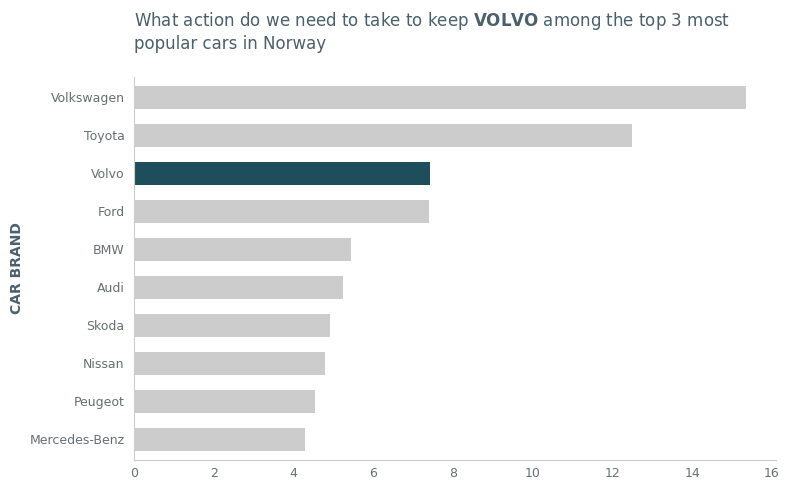

In [23]:
ax = df_percantage_top10.plot(
    kind="barh",
    y="Quantity",
    ylabel="Number cars",
    figsize=(8,5),
    width =0.6,
    color = colors
)
ax.invert_yaxis()

# remove clutter
ax.spines[["top", "right"]].set_visible(False)
ax.legend().remove()

# contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors= GRAY_2, labelsize= 9, length = 0, pad = 5)
ax.tick_params(axis= "y", pad = 7)


# descriptive title and labels - call to action (CTA)
ax.set_title(
    "What action do we need to take to keep "
    + r"$\bf{VOLVO}$" # LaTex mode
    + " among the top 3 most \npopular cars in Norway",
    loc = "left",
    color = GRAY_3,
    pad = 20
)

ax.set_ylabel("PERCENTAGE (%) OF CARS SOLD", color = GRAY_3, fontweight = "bold")
ax.set_ylabel("CAR BRAND", color = GRAY_3, fontweight = "bold")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/2_cars_brand_sold.png")